In [1196]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [1197]:
npz = np.load('part1a.npz')
lst = npz.files
# for item in lst:
#     print(item)
#     print(npz[item])
N = npz['N']
SVC_0_pmf = npz['Svc_0_pmf']
Lc = npz['Lc'] 
I_v= npz['Ic_0']
gamma = npz['gamma']
R = np.zeros(1)
R[0] = 0
Z = np.zeros(21)
I = np.sum(I_v)
S__ = N - I # not sure. Do this so that the total population actually adds to 100000...
S_v_c_2 = np.multiply(SVC_0_pmf, S__) # Preserve matrix form for later...
S_v_c = S_v_c_2.flatten()
S_v_I_v_R = np.concatenate((S_v_c, I_v, R)) 
# print(S_v_c.sum(axis=0).sum(axis=0), I_v, R)

In [1198]:
# Part 1 a. Chose elements for B_v,c in [0.1]

B_v_c = np.random.rand(16).reshape(4,4)
B_v_c = np.sort(B_v_c, axis = 0)
B_v_c_2 = np.sort(B_v_c, axis = 1) # Preserve matrix form for later...
B_v_c = B_v_c_2.flatten() # Now we have elements (0,0) (0,1) (0,2) (0,3) (1,0) .... (3,3)
# print(B_v_c)
# print(B_v_c_2)

In [1199]:
def susceptible_pop_eq(t, y):
    # y is our S_v_I_v_R vector
    # I = infected population
    # Need to get sum of dS_v_c/dt made over v. Should be a (4,1) vector
    # Sum over v. Should have column of c = 0, c= 1, c= 2, c=3
    S_vector=y[:16]
    I_vector=y[16:20]
    R=y[20]
    dSvc_dt = -(B_v_c * S_vector * I_vector.sum()/N)
    dS_v = dSvc_dt.reshape(4,4).sum(axis=0)
    dIc_dt = -(dS_v) - gamma * I_vector
    dR_dt = gamma * I_vector.sum()
    dS_dI_dr = np.concatenate((dSvc_dt, dIc_dt, [dR_dt]), axis = 0)
    return dS_dI_dr

In [1200]:
sol = solve_ivp(fun = susceptible_pop_eq, t_span = (0,120,1), y0 = S_v_I_v_R, dense_output = True)
# print(S_v_I_v_R)
# print(S_v_c)
# print(S_v_I_v_R[:16])

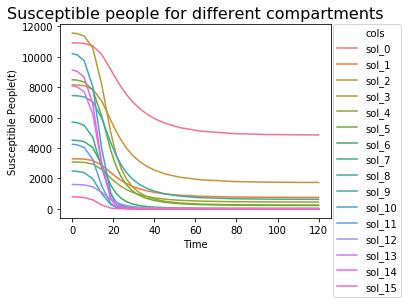

In [1212]:
import seaborn as sns
# S_v_c values over time, 

df1 = pd.DataFrame()
df1.insert(0, "Time", sol.t)
for i in range(16):
    df1.insert(i+1, "sol_{}".format(i), sol.y[i])

df1 = df1.melt("Time", var_name='cols', value_name='Susceptible People(t)')
sns.lineplot(x = "Time", y = "Susceptible People(t)", hue="cols", data=df)
plt.legend(bbox_to_anchor=(1.26, 1),borderaxespad=0)
plt.title("Susceptible people for different compartments", fontsize = 16)
plt.tight_layout()

(22,)


Text(0.5, 1.0, 'Infected people for different comorbidity compartments')

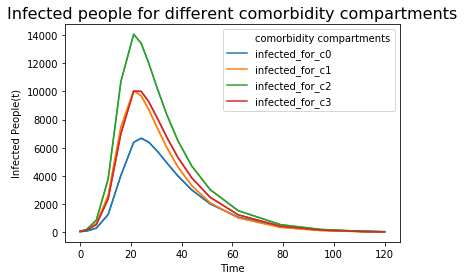

In [1213]:
import seaborn as sns
print(sol.y[0].shape)
for i in range(16,20):
    sns.lineplot(sol.t, sol.y[i])
df2 = pd.DataFrame()
df2.insert(0, "Time", sol.t)
for i in range(16,20):
    df2.insert(i-15, "infected_for_c{}".format(i-16), sol.y[i])

df2 = df2.melt("Time", var_name='comorbidity compartments', value_name='Infected People(t)')
sns.lineplot(x = "Time", y = "Infected People(t)", hue="comorbidity compartments", data=df2)
plt.title("Infected people for different comorbidity compartments", fontsize=16)

In [1217]:
# Plot overall susceptible people

In [ ]:
# Plot overall infected people

Text(0, 0.5, 'Recovered People (t)')

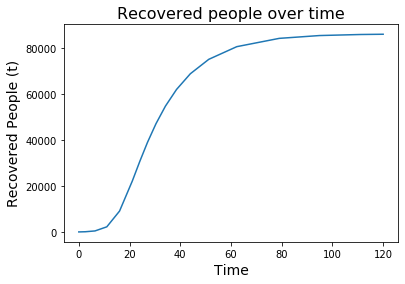

In [1215]:
# Recovered people over time
sns.lineplot(sol.t, sol.y[20])
plt.title("Recovered people over time", fontsize = 16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Recovered People (t)', fontsize=14)

3) The plots definitely look similar to what we expected. In the graph of the infected people over time for each compartment, we can observe what flattening the curve means. For compartment 0, which corresponds to the blue curve, we have a much smaller peak, which means having our health system less strained. THat would correspond to flattening the curve. 

4) Yes, as we can see in some situations the susceptible people converge to 0 and in others it doesn't. This has to do with the ability of the virus to spread. In some situations, the virus will keep spreading until there is no susceptible people. this could happen in situations where there people don't use a mask, there is no social distancing, and there is more social vulnerability and comorbidity. If the virus can't spread that easily because many of this measures are in place, then it won't be able to infect everyone and the susceptible people won't converge to 0.

In [ ]:
# Print percentages of population that never got infected for all compartments (5)

In [1219]:
# Multiply all Beta values by 1/4, plot the curves, and print the population 
# that never got infected with these Beta values


In [1220]:
# Part 1b
data_ = np.load('part1b.npz')
lst_ = data.files
# for item in lst_:
#     print(item)
#     print(data_[item])

N = data_['N']
Lc = data_['Lc']
Ic_0 = data_['Ic_0']
gamma = data_['gamma']
L_validation = data_['L_validation']
L_test = data_['L_test']
betas_validation = data_['betas_validation']

In [1221]:
# print(L_validation.shape)
# np.sum(Lc * Ic_0[1])
# b_c = 0.20
# t = np.linspace(0,20,20)
# print(L_validation.shape, L_validation[0].shape)
# print(betas_validation)
# print(L_validation)

In [1222]:
def susceptible_pop_eq_b_(t, y, beta0, beta1, beta2, beta3):
    S_c = y[0:4]
    I_c = y[4:8]
    R = y[8]
    beta = np.array([beta0, beta1, beta2, beta3])
    dS_dt = -beta * S_c * I_c.sum()/N # This should be a 4x1 vector
    dI_dt = -dS_dt - gamma * I_c
    dR_dt = gamma * I_c.sum()
    dS_dI_dR = np.concatenate((dS_dt, dI_dt, [dR_dt]))
    return dS_dI_dR

In [1223]:
from sklearn.metrics import mean_squared_error
from itertools import product
# Gridsearch
# We want to estimate beta 
# We will try different values of beta and see which one fits better the data
# How? We find I_c and then for each node find L_estimated and compare it with L_validation
beta_grid = np.linspace(0,1,21)
t = np.linspace(0,19,20)
beta_mmse = np.inf
Sc_pmf = np.array([0.5, 0.3, 0.1, 0.1]) # We will solve beta for leaf nodes with vulnerability 0.2
Sc_0 = Sc_pmf * (N - Ic_0_)
R_0 = 0
for (beta0, beta1, beta2, beta3) in product(beta_grid, beta_grid, beta_grid, beta_grid):
    if not (beta0 <= beta1 <= beta2 <= beta3):
        continue
    L_estimated_matrix_for_5_nodes = []
    for i in range(5):
        Ic_0_ = Ic_0[i] # Infected people by compartment for fist 5 nodes with vulnerability 0.2
        y = np.concatenate((Sc_0, Ic_0_, [R_0])) # Solving for nodes with vulnerability 0.2
        sol_object = solve_ivp(fun = susceptible_pop_eq_b_,t_span = (0,20), y0 = y, args = (beta0, beta1, beta2, beta3), dense_output = True)
        # We need the solutions I_c to compute L = sum(I_c L_c) on each day
        solutions = sol_object.sol(t) # Get solutions for 20 days
        L_estimated = []
        for sol_estimated in solutions.T:
            # We want only the Ic. This is y[4,8] in solutions
            # We want L_estimated for time series of 20 days in node i
            Ic_estimated = sol_estimated[4:8] 
            L_estimated.append(np.sum(Ic_estimated * Lc)) 
            
        L_estimated_matrix_for_5_nodes.append(L_estimated) # Now we have the L_estimated for the first 5 nodes
        
    # We are comparing time series of first 5 nodes. 
    mse = 0
    for i in range(5):
        mse += mean_squared_error(L_estimated_matrix_for_5_nodes[i], L_validation[i]) # Do mse of L estimated and L validation for each node
    if mse < beta_mmse:
        beta = [beta0, beta1, beta2, beta3] 
        beta_mmse = mse
print(beta, beta_mmse)

[0.1, 0.15000000000000002, 0.2, 0.25] 37.503196779745096


In [1114]:
print(betas_validation)
print(beta_grid)
print(Ic_0)
print(Lc)

[[0.1  0.15 0.2  0.25]
 [0.2  0.25 0.3  0.4 ]
 [0.35 0.45 0.5  0.6 ]
 [0.4  0.5  0.6  0.8 ]]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[[47 90 51 65]
 [82 31 64 86]
 [30 66 39 47]
 [59 26 77 38]
 [20 63 70 15]
 [35 31 78 11]
 [50 55 93 26]
 [17 89 65 25]
 [70 27 66 97]
 [20 18 32 31]
 [76 13 61 15]
 [86 48 36 89]
 [96 15 44 71]
 [81 53 19 36]
 [29 44 99 36]
 [25 34 16 28]
 [23 84 71 31]
 [91 70 90 90]
 [32 11 68 81]
 [34 37 48 41]]
[0.3 0.4 0.7 1. ]


In [1116]:
print(L_validation[19])

[   99.93560666   199.54808293   365.8590521    650.42023491
  1156.31487856  1988.64188088  3377.13329978  5397.94868832
  8243.85082791 12039.72208365 15835.67211362 19128.32534246
 21390.90254458 22982.235817   22965.83050233 22688.4269024
 22211.68343591 21161.29363716 20100.97646445 18900.25140752]
